<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados I
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Pacote Seaborn;</li>
  <li>Categorias: Gráficos de Barras e de Setores;</li>
  <li>Tendências: Gráficos de Linha e de Área.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preço do diamante por tipo de corte

In [5]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [14]:
# gráfico do exercício 1

diamonds = data[['cut', 'price']].groupby('cut').agg('sum').reset_index()
diamonds.head(20)

,cut,price
0,Ideal,74513487
1,Premium,63221498
2,Very Good,48107623
3,Good,19275009
4,Fair,7017600


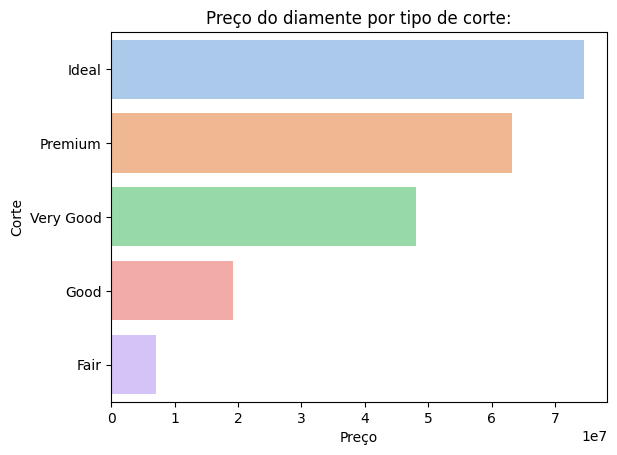

In [16]:
grafico = sns.barplot(data=diamonds, x='price', y='cut', errorbar=None, palette='pastel')
grafico.set(title='Preço do diamente por tipo de corte:', xlabel='Preço', ylabel='Corte');

**Insight do gráfico 1**: Analisando o gráfico, é possivel notar que o corte "Ideal" têm sido o mais valorizado comparado aos outros.


---

## 2\. Número de passageiros em dezembro por ano

In [63]:
import seaborn as sns

data = sns.load_dataset("flights")
data.head(10)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
5,1949,Jun,135
6,1949,Jul,148
7,1949,Aug,148
8,1949,Sep,136
9,1949,Oct,119


<Axes: xlabel='year', ylabel='passengers'>

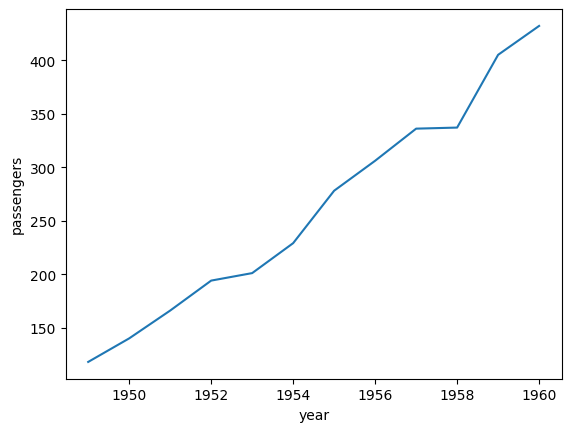

In [73]:
# gráfico do exercício 2
flights_dez = data.query("month == 'Dec'")
sns.lineplot(data=flights_dez, x="year", y="passengers")

In [74]:
flights_wide = data.pivot(index="year", columns="month", values="passengers")
flights_wide.head(12)

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


<Axes: xlabel='year', ylabel='Dec'>

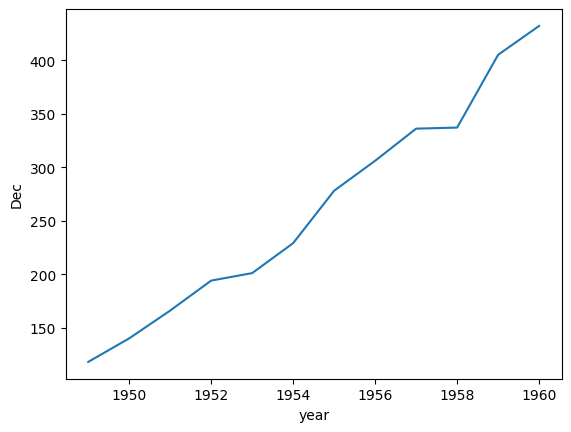

In [62]:
sns.lineplot(data=flights_wide["Dec"])

**Insight do gráfico 2**: O maior fluxo de passageiros ocorreu entre os anos de 1958 e 1960. Entre 1957 e 1959 o fluxo quase se tornou continuo.


---

## 3\. Numero de passageiros por mês entre 1949 e 1959

In [65]:
import seaborn as sns

data = sns.load_dataset("flights")
data.head(12)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
5,1949,Jun,135
6,1949,Jul,148
7,1949,Aug,148
8,1949,Sep,136
9,1949,Oct,119


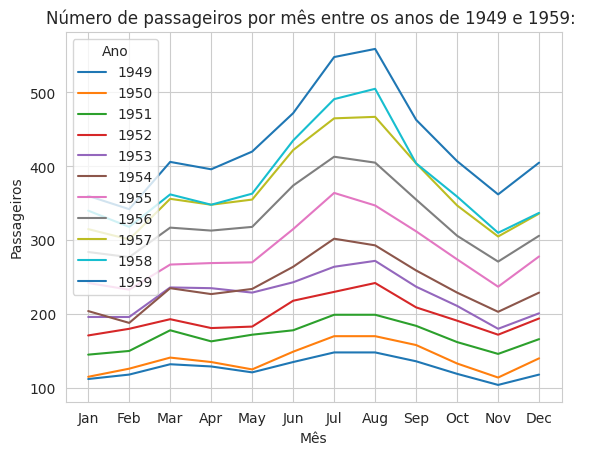

In [81]:
# gráfico do exercício 3
flights = data.query('1949<= year < 1960')

with sns.axes_style('whitegrid'):
  grafico = sns.lineplot(data=flights, x='month', y='passengers', hue='year', palette='tab10')
  grafico.set(title = 'Número de passageiros por mês entre os anos de 1949 e 1959: ', xlabel= 'Mês', ylabel= 'Passageiros');
  grafico.get_legend().set_title('Ano');

**Insight do gráfico 3**: Comparado aos anos posteriores, o ano de 1949 recebeu o maior número de passageiros entre os meses de Junho e Julho mas o mesmo despencou entre os meses de Agosto e Novembro.


---